 # Olympics Project

[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

### Import the libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [11]:
df = pd.read_csv('athlete_events.csv')

### Don't forget to drop duplicates first

In [12]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True, axis=0)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


### Find the missing data in each column

In [13]:
sum_of_missing = df.isnull().sum()
print(sum_of_missing)

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


### Number of males and females

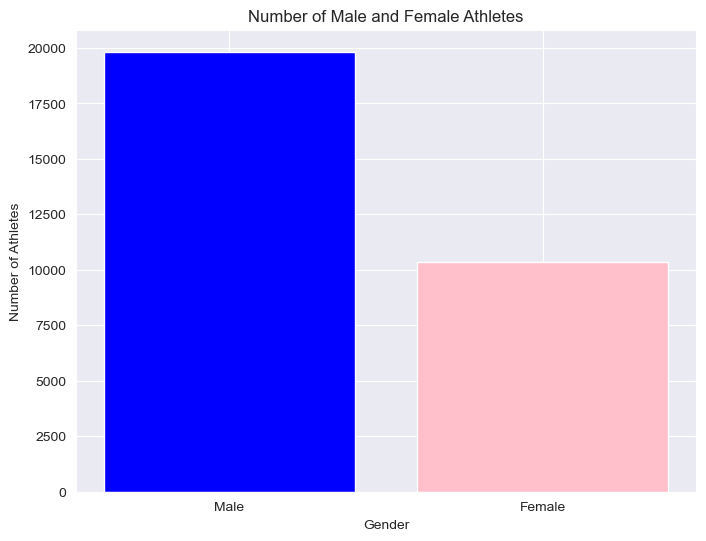

In [14]:
num_of_males = df[df['Sex'] == 'M'].shape[0]
num_of_females = df[df['Sex'] == 'F'].shape[0]


gender = ['Male', 'Female']
counts = [num_of_males, num_of_females]

plt.figure(figsize=(8, 6))

bars = plt.bar(gender, counts, color=['blue', 'pink'])
plt.title('Number of Male and Female Athletes')
plt.xlabel('Gender')
plt.ylabel('Number of Athletes')
plt.show()

### Providing some details about individuals who took part in Olympic events.


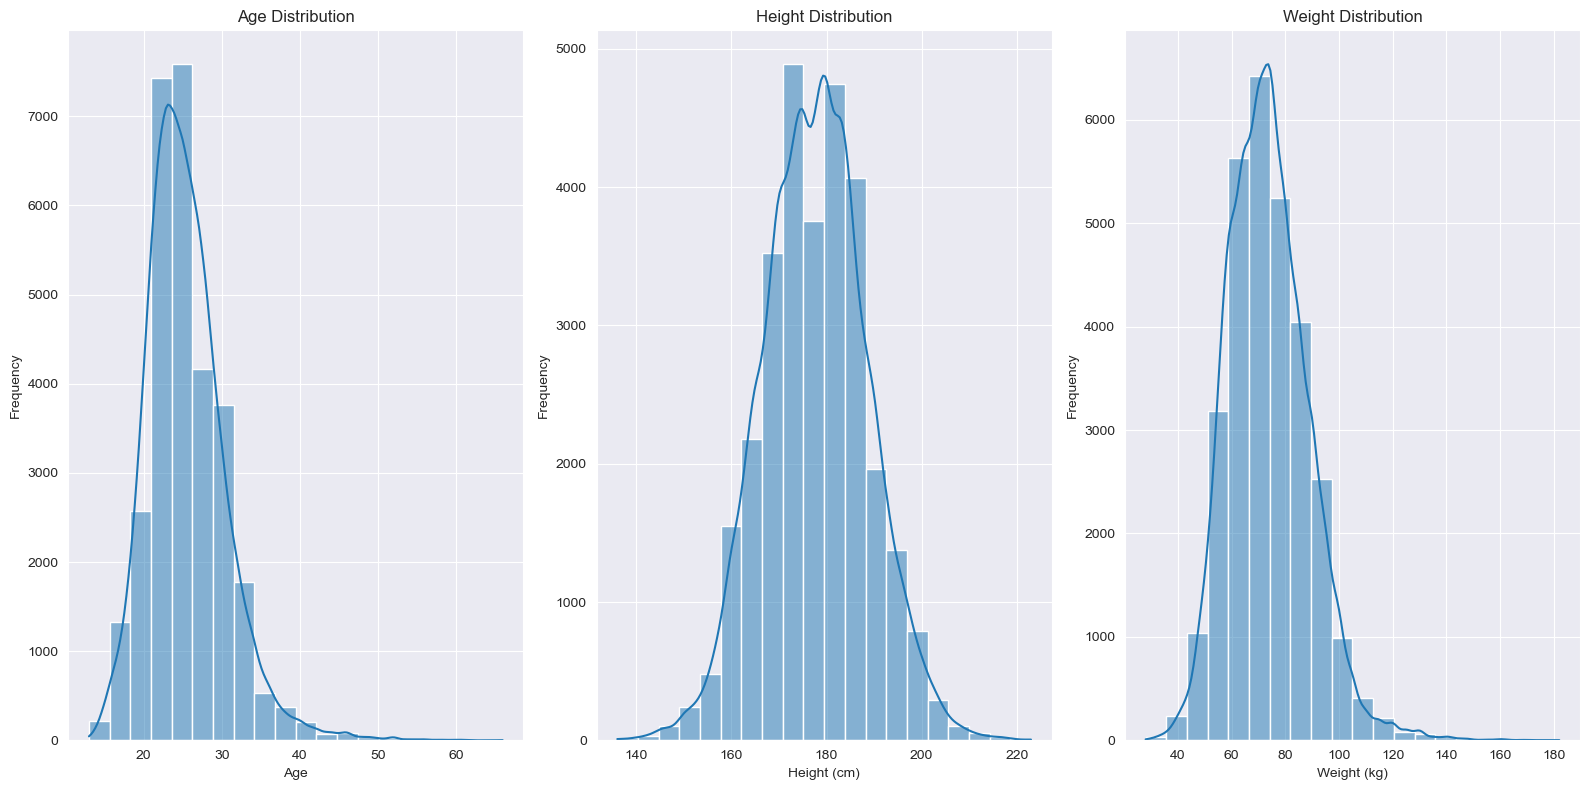

In [15]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
ages = df['Age'].dropna()
sns.histplot(ages, kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
heights = df['Height'].dropna()
sns.histplot(heights, kde=True, bins=20)
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
weights = df['Weight'].dropna()
sns.histplot(weights, kde=True, bins=20)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.savefig("Some_details.png", dpi=200)
plt.tight_layout()
plt.show()


### How many cities do we have and what are they 

In [16]:
city_no = df['City'].nunique()
print(city_no)

42


###  Number of athlete for each year

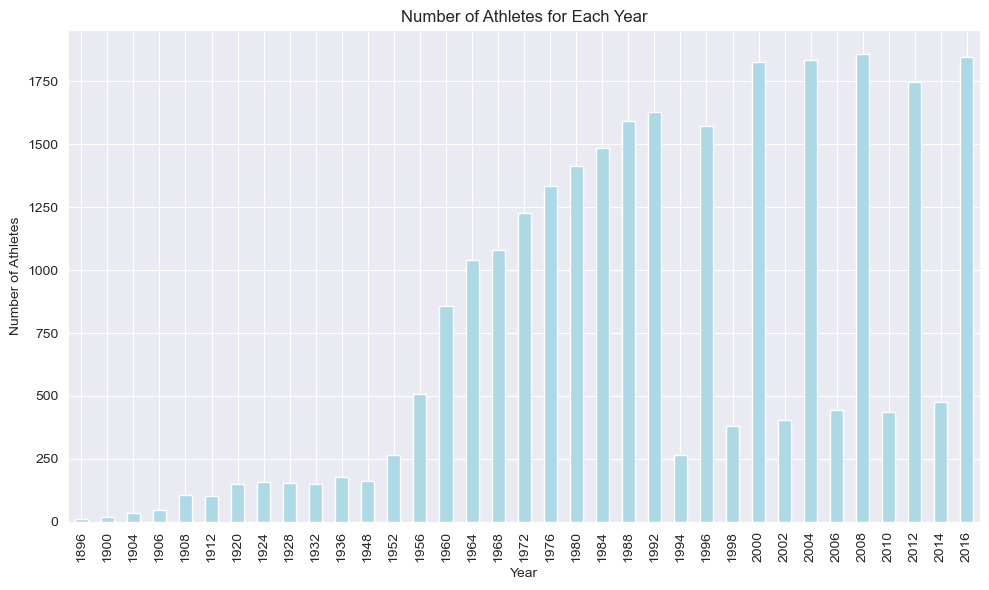

In [17]:
athlete_no = df.groupby('Year')['ID'].nunique()
plt.figure(figsize=(10, 6))

athlete_no.plot(kind='bar', color='lightblue')

plt.title('Number of Athletes for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.tight_layout()
plt.savefig("#_of_athlete.png", dpi=200)

plt.show()

### Which athlete participated the most? (his/her name and ID)

In [18]:
athlete_participation = df.groupby(['ID', 'Name']).size().reset_index(name='Count')
most_participated = athlete_participation.loc[athlete_participation['Count'].idxmax()]
print(f'Most Participated Athlete: {most_participated["Name"]}, ID: {most_participated["ID"]}')

Most Participated Athlete: Michael Fred Phelps, II, ID: 94406


### Find the number of each medal for each year.
##### The output should look like this 
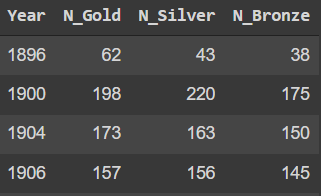

<Figure size 1200x800 with 0 Axes>

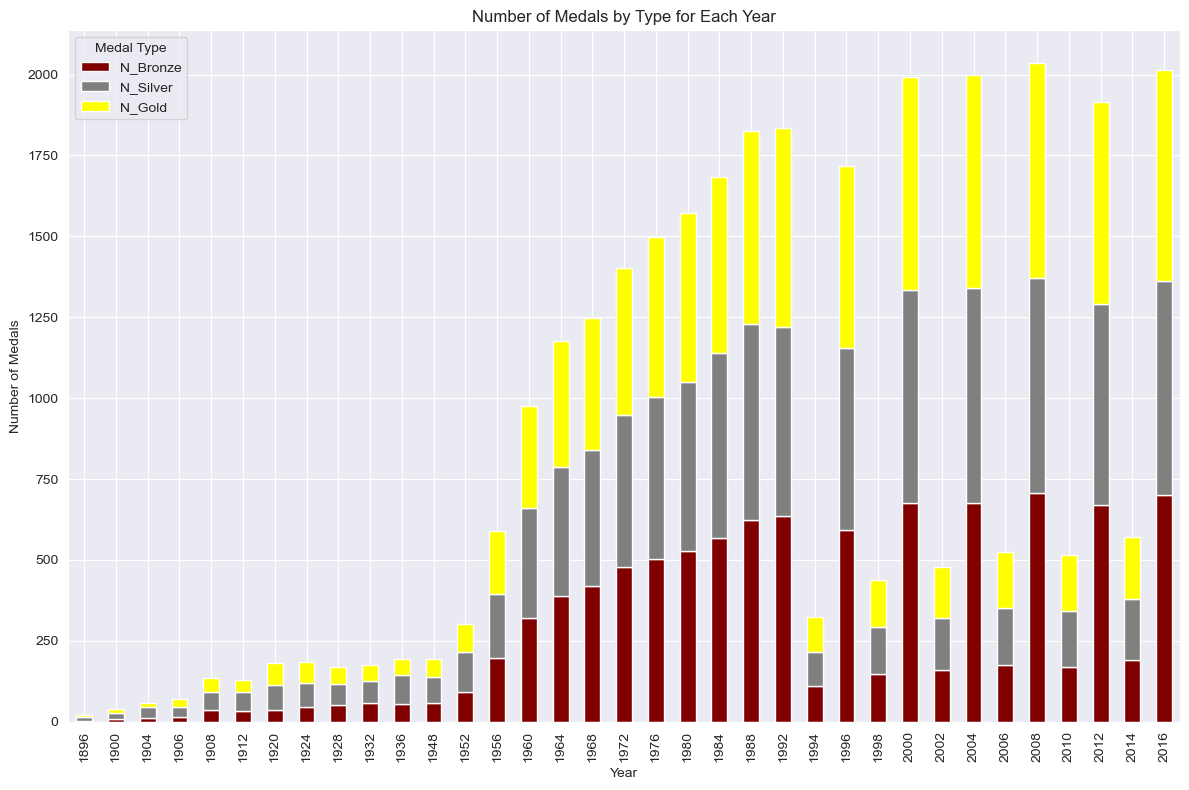

In [19]:
medal_data = df[df['Medal'].notna()]
medal_no = medal_data.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

medal_no = medal_no.rename(columns = {'Gold': 'N_Gold', 'Silver': 'N_Silver', 'Bronze': 'N_Bronze'})
plt.figure(figsize=(12, 8))

medal_no.plot(kind='bar', stacked=True, color=['maroon', 'gray', 'yellow'], figsize=(12, 8))

plt.title('Number of Medals by Type for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')

plt.legend(title='Medal Type', loc='upper left', labels=['N_Bronze', 'N_Silver', 'N_Gold'])

plt.tight_layout()
plt.savefig("dist_medal.png", dpi=200)
plt.show()

### Number of winners with the gold medal in each city

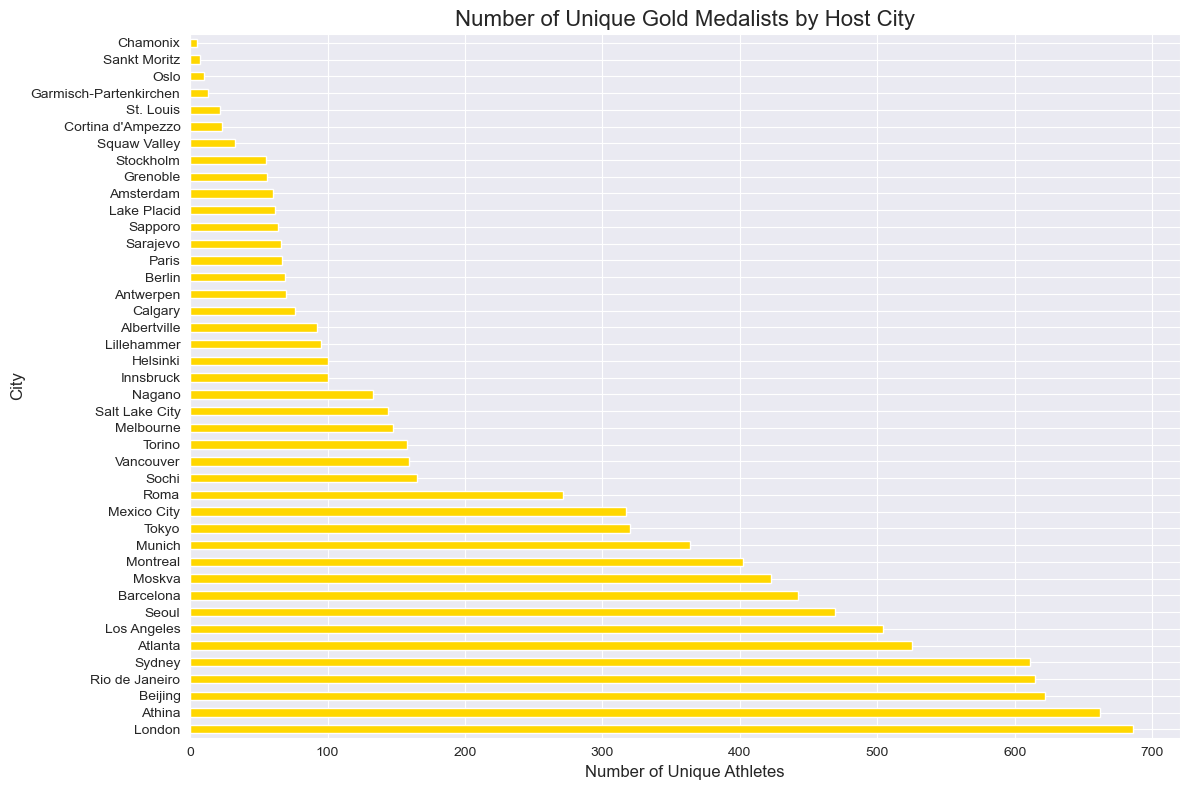

In [20]:
gold_medal = df[df['Medal'] == 'Gold']
winners_in_ecity = gold_medal.groupby('City')['ID'].nunique()

plt.figure(figsize=(12, 8))

winners_in_ecity.sort_values(ascending=False).plot(kind='barh', color='gold')

plt.title('Number of Unique Gold Medalists by Host City', fontsize=16)
plt.xlabel('Number of Unique Athletes', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.savefig("Gold_medal.png", dpi=200)

plt.show()

### Total missing data for each year

In [21]:
sum_of_missing = df.groupby('Year').apply(lambda x: x.isna()).sum()
print(sum_of_missing)

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


C:\Users\DRT\AppData\Local\Temp\ipykernel_17020\701218369.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sum_of_missing = df.groupby('Year').apply(lambda x: x.isna()).sum()


### Has the number of athletes changed over time for Summer and Winter?

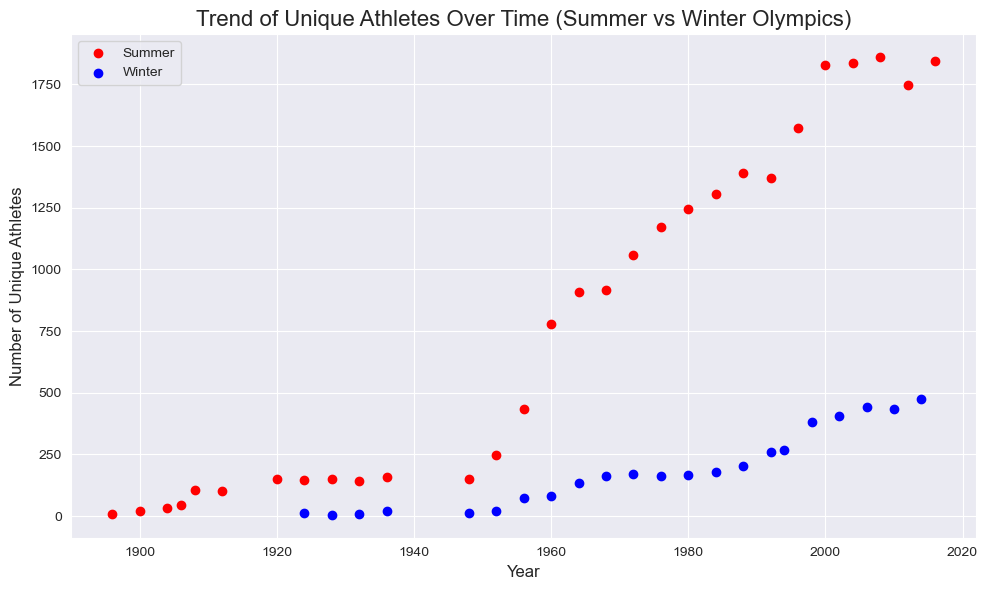

In [22]:
unique_athletes_by_year = df.groupby(['Year', 'Season'])['ID'].nunique().reset_index()
plt.figure(figsize=(10, 6))

plt.scatter(data=unique_athletes_by_year[unique_athletes_by_year['Season'] == 'Summer'],
            x='Year', y='ID', c='red', label='Summer')

plt.scatter(data=unique_athletes_by_year[unique_athletes_by_year['Season'] == 'Winter'],
            x='Year', y='ID', c='blue', label='Winter')

plt.title('Trend of Unique Athletes Over Time (Summer vs Winter Olympics)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Athletes', fontsize=12)
plt.legend()

plt.tight_layout()
plt.savefig("winter_vs_summer.png", dpi=200)

plt.show()